# Examination of Discount Curve Interpolation Schemes

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from financepy.finutils.FinDate import FinDate
from financepy.finutils.FinTestCases import FinTestCases, globalTestCaseMode
from financepy.market.curves.FinInterpolate import interpolate, FinInterpMethods
from financepy.market.curves.FinDiscountCurve import FinDiscountCurve

In [6]:
tValues = np.array([0.0, 3.0, 5.0, 10.0])
rValues = np.array([0.04, 0.07, 0.08, 0.09])
dfValues = np.exp(-tValues*rValues)
tInterpValues = np.linspace(0.0, 12.0, 200)

In [7]:
print(tValues)
print(rValues)
print(dfValues)

[ 0.  3.  5. 10.]
[0.04 0.07 0.08 0.09]
[1.         0.81058425 0.67032005 0.40656966]


In [8]:
curveDate = FinDate(3,1,2019)

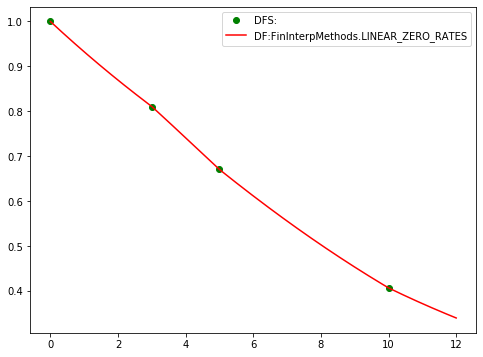

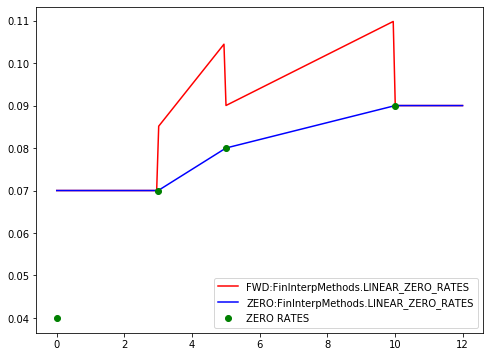

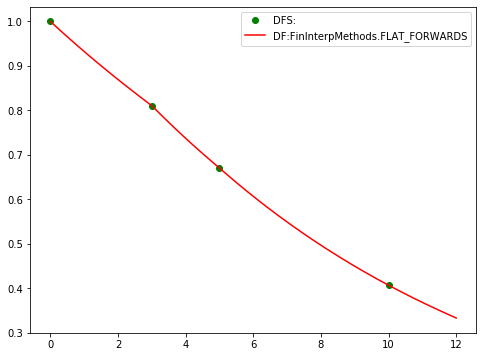

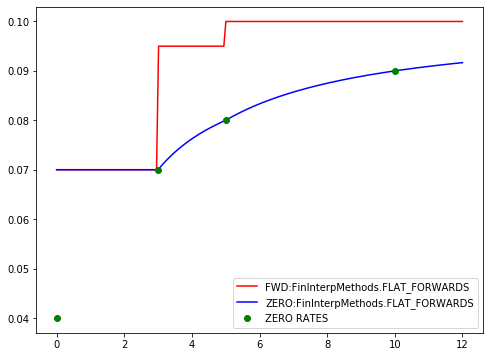

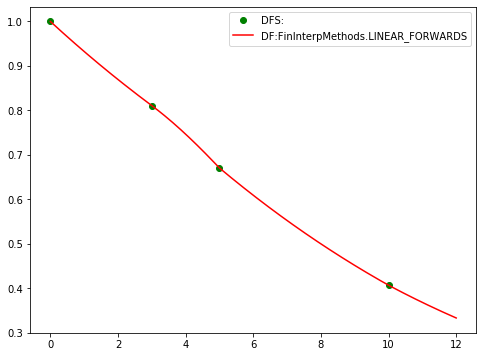

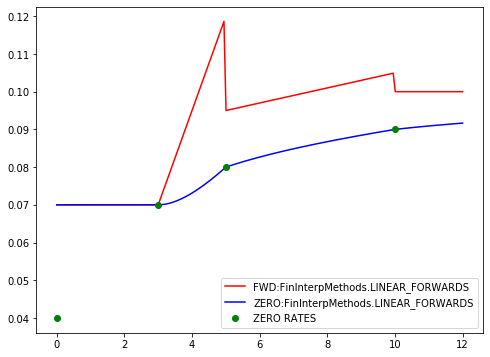

In [9]:
for method in FinInterpMethods:

    discountCurve = FinDiscountCurve(curveDate, tValues, dfValues, method)
    dfInterpValues = discountCurve.df(tInterpValues)
    fwdInterpValues = discountCurve.fwd(tInterpValues)
    zeroInterpValues = discountCurve.zeroRate(tInterpValues)

    plt.figure(figsize=(8, 6))
    plt.plot(tValues, dfValues, 'o', color='g', label="DFS:")
    plt.plot(tInterpValues, dfInterpValues, color='r', label="DF:" + str(method))
    plt.legend()

    plt.figure(figsize=(8, 6))
    plt.plot(tInterpValues, fwdInterpValues, color='r', label="FWD:" + str(method))
    plt.plot(tInterpValues, zeroInterpValues, color='b', label="ZERO:" + str(method))
    plt.plot(tValues, rValues, 'o', color='g',  label="ZERO RATES")
    plt.legend()

Copyright (c) 2020 Dominic O'Kane